In [10]:
# Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [6]:
# Define dataset path
dataset_path = "C:\\Users\\asaia\\OneDrive\\Desktop\\SVM\\cats_dogs_dataset\\PetImages"

In [7]:
IMG_SIZE = 128  # Resize all images to 128x128

In [8]:
# Load images and labels
X = []
y = []

In [11]:
# Allowed image extensions
valid_extensions = (".jpg", ".jpeg", ".png")

In [12]:
# Loop through cat and dog images
for label, category in enumerate(["cat", "dog"]):
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        if not img_name.lower().endswith(valid_extensions):
            print(f"Skipping non-image file: {img_name}")
            continue
        img_path = os.path.join(category_path, img_name)
        try:
            # Open image using PIL (handles corrupt images better)
            img = Image.open(img_path).convert("RGB")
            img = img.resize((IMG_SIZE, IMG_SIZE))  # Resize image
            img = np.array(img)  # Convert to NumPy array
            X.append(img)
            y.append(label)  # 0 for cat, 1 for dog
        except Exception as e:
            print(f"Skipping corrupted image: {img_path} - Error: {e}")
            continue  # Skip this image if there's an error

Skipping non-image file: Thumbs.db


c:\Users\asaia\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Skipping non-image file: Thumbs.db


In [13]:
# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

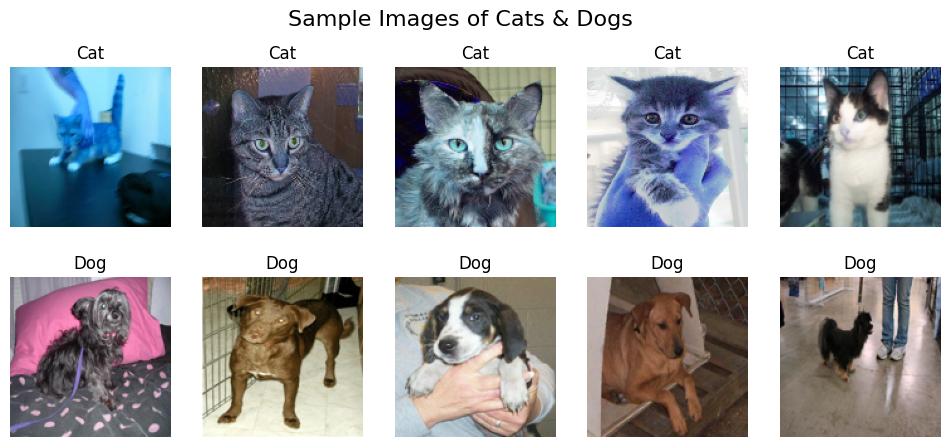

In [31]:
num_samples = 5
# Select random cat and dog images
cat_indices = [i for i in range(len(y)) if y[i] == 0][:num_samples]
dog_indices = [i for i in range(len(y)) if y[i] == 1][:num_samples]
# Create a subplot to show images
fig, axes = plt.subplots(2, num_samples, figsize=(12, 5))
# Plot cat images
for i, idx in enumerate(cat_indices):
    axes[0, i].imshow(X[idx])
    axes[0, i].set_title("Cat")
    axes[0, i].axis("off")
# Plot dog images
for i, idx in enumerate(dog_indices):
    axes[1, i].imshow(X[idx])
    axes[1, i].set_title("Dog")
    axes[1, i].axis("off")
plt.suptitle("Sample Images of Cats & Dogs", fontsize=16)
plt.show()

In [15]:
# Load pre-trained VGG16 model (excluding fully connected layers)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [16]:
# Extract features using VGG16
X_features = model.predict(X)
# Flatten features
X_features = X_features.reshape(X_features.shape[0], -1)

785/785 ━━━━━━━━━━━━━━━━━━━━ 2103s 3s/step


In [17]:
# Standardize the extracted features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

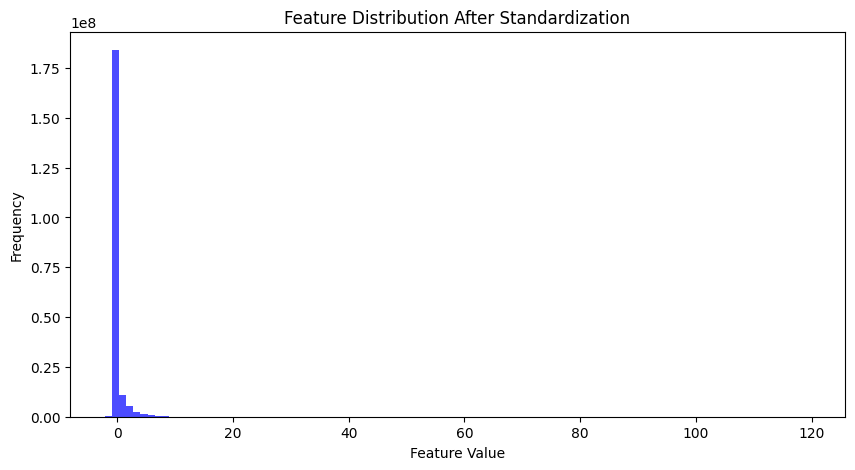

In [18]:
# Visualize feature distribution after standardization
plt.figure(figsize=(10, 5))
plt.hist(X_features.ravel(), bins=100, color="blue", alpha=0.7)
plt.title("Feature Distribution After Standardization")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.show()

In [19]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

In [20]:
# Train the SVM model
svm_model = SVC(kernel="linear", C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [22]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9213304122684725

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      2556
           1       0.92      0.92      0.92      2465

    accuracy                           0.92      5021
   macro avg       0.92      0.92      0.92      5021
weighted avg       0.92      0.92      0.92      5021


Confusion Matrix:
 [[2358  198]
 [ 197 2268]]


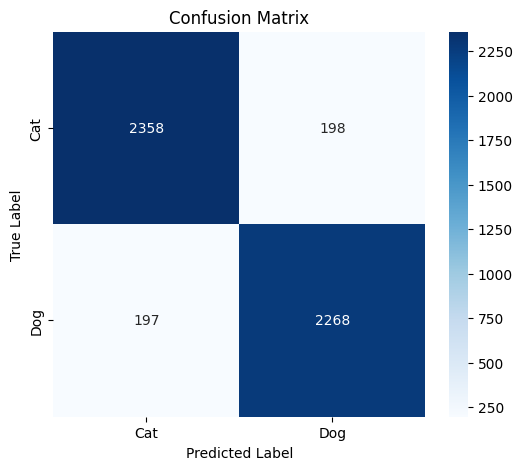

In [23]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()